<a href="https://colab.research.google.com/github/solo11/ub-rl/blob/main/RL_ASG_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym 
import matplotlib.pyplot as plt
from gym import spaces
import numpy as np
import random
import h5py

from google.colab import widgets
import time

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
class GridEnvironmentDeterministic(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):

        self.obs_num = 16
        self.action_num = 4

        self.observation_space = spaces.Discrete(self.obs_num)
        self.action_space = spaces.Discrete(self.action_num)

        # positions
        self.up = 0
        self.down = 1
        self.right = 2
        self.left = 3

        # initial positions
        self.state = np.zeros((4,4))
        self.agent_pos=[0,0]
        self.goal_pos=[3,3]

        # reward positions
        self.rewards = {
            (2,0): -3,
            (1,2):-4,
            (1,0):2,
            (3,1):5,
            (3,3):100
        }
        self.done = False
        self.max_timesteps = 10

    def reset(self):
        
        self.done = False
        self.state = np.zeros((4,4))
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]       
        
        self.state[tuple(self.agent_pos)] = 10

        observation = self.state.flatten()
        return self.agent_pos
    
    def step(self, action):

        self.state = np.random.choice(self.observation_space.n)
        if action == self.up:
          self.agent_pos[0] -= 1
        if action == self.down:
          self.agent_pos[0] += 1
        if action == self.right:
          self.agent_pos[1] += 1
        if action == self.left:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))

        self.state[tuple(self.agent_pos)] = 10
        observation = self.state.flatten()
        
        reward = 0

        agent_pos_tuple = tuple(self.agent_pos)

        if (agent_pos_tuple in self.rewards):
          if(self.agent_pos == self.goal_pos).all():
            reward = self.rewards[agent_pos_tuple]
            self.done = True
          reward = self.rewards[agent_pos_tuple]
        
        return self.agent_pos, reward, self.done, self.state
        
    def render(self):
          
      fig1, (ax1)= plt.subplots(figsize=(6, 6))

      current_pos = tuple(self.agent_pos)

      # agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_initial_pos.png'), zoom=0.28),
      #                                        np.add([0,0], [0.5, 0.5]), frameon=False)
      # ax1.add_artist(agent)
      for x,val in self.rewards.items():
        if x == (3,3):
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/goal.png'), zoom=0.28),
                                            np.add(x[::-1], [0.5, 0.5]), frameon=False)
          ax1.add_artist(agent)
        elif val >0:
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/reward.png'), zoom=0.20),
                                            np.add(x[::-1], [0.5, 0.5]), frameon=False)
          ax1.add_artist(agent)
        elif val <0:
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/blocked.png'), zoom=0.28),
                                            np.add(x[::-1], [0.5, 0.5]), frameon=False)
          ax1.add_artist(agent)


      if current_pos== (0,0):
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_initial_pos.png'), zoom=0.28),
                                            np.add([0,0], [0.5, 0.5]), frameon=False)
      elif current_pos == (3,3):
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_goal_pos.png'), zoom=0.28),
                                            np.add(current_pos[::-1], [0.5, 0.5]), frameon=False)
      elif current_pos in self.rewards:
        if self.rewards[current_pos] > 0:
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_reward_pos.png'), zoom=0.28),
                                            np.add(current_pos[::-1], [0.5, 0.5]), frameon=False)
      elif current_pos != (0,0):
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_navigating.png'), zoom=0.28),
                                            np.add(current_pos[::-1], [0.5, 0.5]), frameon=False)
      ax1.add_artist(agent)

      plt.xticks([4,3,2,1,0])
      plt.yticks([4,3,2,1,0])
 
      plt.gca().invert_yaxis()
      plt.grid() 

      plt.show()
        


In [ ]:
class GridEnvironmentStochastic(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.obs_num = 16
        self.action_num = 4
        self.obs_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)

        # positions
        self.up = 0
        self.down = 1
        self.right = 2
        self.left = 3

        # initial positions
        self.state = np.zeros((4,4))
        self.agent_pos=[0,0]
        self.goal_pos=[3,3]

        # reward positions
        # given in the format grid position, reward value
        self.rewards = {
            (2,0): -3,
            (1,2):-4,
            (1,0):2,
            (3,1):5,
            (3,3):100
        }
        self.done = False
        self.max_timesteps = 10

    def reset(self):
        
        self.done = False
        self.state = np.zeros((4,4))
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]       
        
        self.state[tuple(self.agent_pos)] = 10

        observation = self.state.flatten()

        self.max_timesteps = 10

        return self.agent_pos
    
    def step(self, action):
        random_action = False

        # stochastic action selection at a probability of 0.6 for the given action and 0.4 for random action,
        # 60% of the time the given action is executed and 40% of the time a random action is executed 
        
        choose_action = [action,np.random.choice(self.action_space.n)]
        stoc_action = random.choices(choose_action, weights=(60, 40))
        if action != stoc_action[0]:
          random_action = True
        action = stoc_action[0]

        # print("action_step:",stoc_action)

        if action == self.up:
          self.agent_pos[0] -= 1
        if action == self.down:
          self.agent_pos[0] += 1
        if action == self.right:
          self.agent_pos[1] += 1
        if action == self.left:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))

        self.state[tuple(self.agent_pos)] = 10
        observation = self.state.flatten()
        
        reward = 0

        agent_pos_tuple = tuple(self.agent_pos)

        if (agent_pos_tuple in self.rewards):
          if(self.agent_pos == self.goal_pos).all():
            reward = self.rewards[agent_pos_tuple]
            self.done = True
          reward = self.rewards[agent_pos_tuple]
        
        return self.agent_pos, reward, self.done, self.state, random_action
        
    def render(self):
            
      fig1, (ax1)= plt.subplots(figsize=(6, 6))

      current_pos = tuple(self.agent_pos)

      # agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_initial_pos.png'), zoom=0.28),
      #                                        np.add([0,0], [0.5, 0.5]), frameon=False)
      # ax1.add_artist(agent)
      for x,val in self.rewards.items():
        if x == (3,3):
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/goal.png'), zoom=0.28),
                                            np.add(x[::-1], [0.5, 0.5]), frameon=False)
          ax1.add_artist(agent)
        elif val >0:
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/reward.png'), zoom=0.20),
                                            np.add(x[::-1], [0.5, 0.5]), frameon=False)
          ax1.add_artist(agent)
        elif val <0:
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/blocked.png'), zoom=0.28),
                                            np.add(x[::-1], [0.5, 0.5]), frameon=False)
          ax1.add_artist(agent)


      if current_pos== (0,0):
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_initial_pos.png'), zoom=0.28),
                                            np.add([0,0], [0.5, 0.5]), frameon=False)
      elif current_pos == (3,3):
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_goal_pos.png'), zoom=0.28),
                                            np.add(current_pos[::-1], [0.5, 0.5]), frameon=False)
      elif current_pos in self.rewards:
        if self.rewards[current_pos] > 0:
          agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_reward_pos.png'), zoom=0.28),
                                            np.add(current_pos[::-1], [0.5, 0.5]), frameon=False)
      elif current_pos != (0,0):
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent_navigating.png'), zoom=0.28),
                                            np.add(current_pos[::-1], [0.5, 0.5]), frameon=False)
      ax1.add_artist(agent)

      plt.xticks([4,3,2,1,0])
      plt.yticks([4,3,2,1,0])
 
      plt.gca().invert_yaxis()
      plt.grid() 

      plt.show()
              


In [ ]:
# env = GridEnvironmentStochastic()
# env.reset()
# env.render()

Testing the environment 

In [ ]:
# actions = [0,1,2,3,0,0,1,2,3]
# for i in actions:
#   agent_pos, reward, done, state, random_action = env.step(i)
#   env.render()

## Implementing Q-Learning algorithm

### Deterministic environment 

In [ ]:
  # Implementing the algorithm 
def q_learning_det():
    no_of_episodes = 200

    # no of iterations
    max_no_of_episode = 100

    # epsilon
    exploration_proba = 1

    min_exploration_proba = 0.01

    #discounted factor
    gamma = 0.97

    #learning rate
    lr = 0.2

    rewards_per_episode = list()
    total_rewards_episode = list()

    epsilon_decay = list()


    env = GridEnvironmentDeterministic()

    q_table_1_deterministic = np.zeros((env.obs_num,env.action_num))

    for j in range(no_of_episodes):
      current_state = env.reset()
      current_state = current_state[0] * 4 + current_state[1]
      done = False

      total_episode_reward = 0

      for i in range(max_no_of_episode):
        if np.random.uniform(0,1) < exploration_proba:
          action = env.action_space.sample()
        else:
          action = np.argmax(q_table_1_deterministic[current_state,:])

        next_pos, reward, done ,state= env.step(action)
        next_pos = next_pos[0] * 4 + next_pos[1]

        try:
          q_table_1_deterministic[current_state,action] = q_table_1_deterministic[current_state,action] + lr * ((reward + gamma * max(q_table_1_deterministic[next_pos,:])) - q_table_1_deterministic[current_state,action])
        except:
          print(current_state,action)


        total_episode_reward = total_episode_reward + reward

        if done:
          break
        current_state = next_pos

      exploration_proba =  max(min_exploration_proba,exploration_proba *  0.9772)
      epsilon_decay.append(exploration_proba)
      rewards_per_episode.append(total_episode_reward)
      # (0.01 / 1)^(1/1000)
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Total rewards',fontsize=12)
    plt.show()

    print("epsilon decay")
    plt.plot(epsilon_decay)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Epsilon value',fontsize=12)
    plt.show()
    return q_table_1_deterministic


### Stochastic environment

In [ ]:
def q_learning_stoch():

# Initilizing the hyper parameters for stochastic env

    # no. of episodes
    no_of_episodes = 500

    # no of iterations
    max_no_of_episode = 100

    # epsilon
    exploration_proba = 1

    exploration_decreasing_decay = 0.001

    min_exploration_proba = 0.01

    #discounted factor
    gamma = 0.8

    #learning rate
    lr = 0.1

    rewards_per_episode = list()
    total_rewards_episode = list()

    epsilon_decay = list()

    # env.reset()

    # state_positon = q[0] * 4 + q[1] 
    # Initilize the q table
    # env = GridEnvironmentDeterministic()
    env = GridEnvironmentStochastic()
    # print(env.observation_space)
    q_table_1_stochastic = np.zeros((env.obs_num,env.action_num))

    # implementing the algorithm 

    for j in range(no_of_episodes):
      current_state = env.reset()
      current_state = current_state[0] * 4 + current_state[1]
      done = False

      total_episode_reward = 0

      for i in range(max_no_of_episode):
        # current_state = current_state[0] * 4 + current_state[1] 
        if np.random.uniform(0,1) < exploration_proba:
          action = env.action_space.sample()
        else:
          action = np.argmax(q_table_1_stochastic[current_state,:])

        next_pos, reward, done ,state,random_action= env.step(action)
        next_pos = next_pos[0] * 4 + next_pos[1]

        try:
          q_table_1_stochastic[current_state,action] = q_table_1_stochastic[current_state,action] + lr * ((reward + gamma * max(q_table_1_stochastic[next_pos,:])) - q_table_1_stochastic[current_state,action])
        except:
          print(current_state,action)


        total_episode_reward = total_episode_reward + reward

        if done:
          break
        current_state = next_pos

      exploration_proba =  max(min_exploration_proba,exploration_proba *  0.9908)
      epsilon_decay.append(exploration_proba)
      rewards_per_episode.append(total_episode_reward)
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Total rewards',fontsize=12)
    plt.show()

    print("epsilon decay")
    plt.plot(epsilon_decay)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Epsilon value',fontsize=12)
    plt.show()
    return q_table_1_stochastic



## Implementing SARSA

### Deterministic Environment 

In [ ]:
def sarsa_det():

    # initilizing the hyper parameters
    # no. of episodes
    no_of_episodes = 200

    # no of iterations
    max_no_of_episode = 100

    # epsilon
    exploration_proba = 1

    exploration_decreasing_decay = 0.001

    min_exploration_proba = 0.001

    #discounted factor
    gamma = 0.98

    #learning rate
    lr = 0.2

    rewards_per_episode = list()
    total_rewards_episode = list()

    epsilon_decay = list()

    # env.reset()

    # state_positon = q[0] * 4 + q[1] 
    # Initilize the q table
    # env = GridEnvironmentDeterministic()
    env = GridEnvironmentDeterministic()
    # print(env.observation_space)
    q_table_2_deterministic = np.zeros((env.obs_num,env.action_num))



    # implementing SARSA

    for j in range(no_of_episodes):
      current_state = env.reset()
      current_state = current_state[0] * 4 + current_state[1]
      done = False

      total_episode_reward = 0

      if np.random.uniform(0,1) < exploration_proba:
          action = env.action_space.sample()
      else:
          action = np.argmax(q_table_2_deterministic[current_state,:])

      for i in range(max_no_of_episode):
        # current_state = current_state[0] * 4 + current_state[1] 
        next_pos, reward, done ,state= env.step(action)
        next_pos = next_pos[0] * 4 + next_pos[1]

        if np.random.uniform(0,1) < exploration_proba:
                next_action = env.action_space.sample()
        else:
          next_action = np.argmax(q_table_2_deterministic[next_pos,:])
      
        # if(current_state == next_pos):
        #   reward = 0

        try:
          q_table_2_deterministic[current_state,action] = q_table_2_deterministic[current_state,action] + lr * (reward + gamma * q_table_2_deterministic[next_pos,next_action] - q_table_2_deterministic[current_state,action])
        except:
          print(current_state,action)


        total_episode_reward = total_episode_reward + reward

        if done:
          break
        current_state = next_pos
        action = next_action

      exploration_proba = max(min_exploration_proba, exploration_proba * 0.9772)
      epsilon_decay.append(exploration_proba)
      rewards_per_episode.append(total_episode_reward)

    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Total rewards',fontsize=12)
    plt.show()

    print("epsilon decay")
    plt.plot(epsilon_decay)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Epsilon value',fontsize=12)
    plt.show()
    return q_table_2_deterministic


### Stochatic


In [ ]:
def sarsa_stoch():
# initilizing the hyper parameters


    # no. of episodes
    no_of_episodes = 1000

    # no of iterations
    max_no_of_episode = 100

    # epsilon
    exploration_proba = 1

    exploration_decreasing_decay = 0.001

    min_exploration_proba = 0.001

    #discounted factor
    gamma = 0.95

    #learning rate
    lr = 0.1

    rewards_per_episode = list()
    total_rewards_episode = list()

    epsilon_decay = list()

    # env.reset()

    # state_positon = q[0] * 4 + q[1] 
    # Initilize the q table
    # env = GridEnvironmentDeterministic()
    env = GridEnvironmentStochastic()
    # print(env.observation_space)
    q_table_2_stochastic = np.zeros((env.obs_num,env.action_num))

    # SARSA

    for j in range(no_of_episodes):
      current_state = env.reset()
      current_state = current_state[0] * 4 + current_state[1]
      done = False

      total_episode_reward = 0

      if np.random.uniform(0,1) < exploration_proba:
          action = env.action_space.sample()
      else:
          action = np.argmax(q_table_2_stochastic[current_state,:])

      for i in range(max_no_of_episode):
        # current_state = current_state[0] * 4 + current_state[1] 
        next_pos, reward, done ,state,ra= env.step(action)
        next_pos = next_pos[0] * 4 + next_pos[1]

        if np.random.uniform(0,1) < exploration_proba:
                next_action = env.action_space.sample()
        else:
          next_action = np.argmax(q_table_2_stochastic[next_pos,:])
      
        # if(current_state == next_pos):
        #   reward = 0

        try:
          q_table_2_stochastic[current_state,action] = q_table_2_stochastic[current_state,action] + lr * (reward + gamma * q_table_2_stochastic[next_pos,next_action] - q_table_2_stochastic[current_state,action])
        except:
          print(current_state,action)


        total_episode_reward = total_episode_reward + reward

        if done:
          break
        current_state = next_pos
        action = next_action

      exploration_proba = max(min_exploration_proba, exploration_proba *0.9954)
      epsilon_decay.append(exploration_proba)
      rewards_per_episode.append(total_episode_reward)
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Total rewards',fontsize=12)
    plt.show()

    print("epsilon decay")
    plt.plot(epsilon_decay)
    plt.xlabel('Episodes',fontsize=12)
    plt.ylabel('Epsilon value',fontsize=12)
    plt.show()
    return q_table_2_stochastic


In [ ]:
def test(env,q_table,is_stochastic,print_output):
  current_state = env.reset()
  current_state = current_state[0] * 4 + current_state[1]
  done = False

  if(print_output):
    env.render()
    output_grid = widgets.Grid(2, 2)
  total_reward = 0
  

  action_map = {
      0:'up',
      1:'down',
      2:'right',
      3:'left'
  }

  while not done:
    action = np.argmax(q_table[current_state,:])
    if (is_stochastic):
      next_pos, reward, done ,state, random_action= env.step(action)
    else:
      next_pos, reward, done ,state= env.step(action)
    next_pos = next_pos[0] * 4 + next_pos[1]
    current_state = next_pos
    
    total_reward = reward + total_reward
    
    if(print_output):
      with output_grid.output_to(0, 0):
        print('State:',current_state)
        print('Reward:',reward)
        # print('Action:', action_map[action])
        print('Action',action)
        if (is_stochastic):
          print('random_action',random_action)
        env.render()
        print('-----------------')
      time.sleep(1)
  return total_reward

In [ ]:
def plot_comparision(total_reward_q_1_list,total_reward_s_1_list):
  fig = plt.subplots(figsize =(12, 8))

  plt.plot(total_reward_q_1_list[:50],label='Q-Learning')
  plt.plot(total_reward_s_1_list[:50],label='SARSA')
  # fig = plt.subplots(figsize =(12, 8))
  plt.xlabel('episodes')
  plt.ylabel('total reward')
  plt.legend()
  plt.show()

  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))

  br1 = np.arange(len(total_reward_q_1_list[:10]))
  br2 = [x + barWidth for x in br1]

  plt.bar(br1, total_reward_q_1_list[:10], color ='lightblue', width = barWidth,
          edgecolor ='grey', label ='Q-Learninig')
  plt.bar(br2, total_reward_s_1_list[:10], color ='orange', width = barWidth,
          edgecolor ='grey', label ='SARSA')

  plt.xticks([r  for r in range(len(br1))])

  plt.legend()
  plt.show()

In [ ]:
def main():
  print('visualization of the grid environment using random actions to demonstrate the visualizations \n')

  env = GridEnvironmentDeterministic()
  env.reset()
  env.render()

  actions = [1,2,1,1,2,2]

  for a in actions:
    next_pos, reward, done ,state= env.step(a)
    env.render()

# The variable read_from_hf is used to indicate read the trained Q-Table values from the h5 file in order to repplicate the results
# make this variable False if you wish to calcutate the Q-tables by running the learning algorithms 
  read_from_h5 = True

  if(not read_from_h5):
    print('\n\n\n\n\n')
    print('Implementing Q Learning for Deterministic Environment \n')
    q_table_1_det = q_learning_det()
    print('\n\n\n\n\n')
    print('Implementing Q Learning for Stochastic Environment \n')
    q_table_1_soc = q_learning_stoch()
    print('\n\n\n\n\n')
    print('Implementing SARSA for Deterministic Environment \n')
    q_table_2_det = sarsa_det()
    print('\n\n\n\n\n')
    print('Implementing SARSA for Stochastic Environment \n')
    q_table_2_soc = sarsa_stoch()

  else:
    hf_read = h5py.File('data.h5', 'r')
    q_table_1_det = hf_read.get('Q_learning_deterministic')
    q_table_1_soc = hf_read.get('Q_learning_stochastic')
    q_table_2_det = hf_read.get('SARSA_deterministic')
    q_table_2_soc = hf_read.get('SARSA_stochastic')

  print('\n\n\n\n\n #################### TESTING THE ALGORITHMS FOR 10 EPISODES #######################\n\n')

  print('Evaluating Q-Learning for deterministic environment for 10 episodes')
  env = GridEnvironmentDeterministic()
  total_reward_10_q_1 = list()
  for i in range(10):
    total_reward = 0
    total_reward = test(env,q_table_1_det,False,False)
    total_reward_10_q_1.append(total_reward)
  plt.plot(total_reward_10_q_1)
  plt.xlabel('Episodes',fontsize=12)
  plt.ylabel('Total rewards',fontsize=12)
  plt.show()


  print('\n\nEvaluating SARSA for deterministic environment for 10 episodes')
  env = GridEnvironmentDeterministic()
  total_reward_10_s_1 = list()
  for i in range(10):
    total_reward = 0
    total_reward = test(env,q_table_2_det,False,False)
    total_reward_10_s_1.append(total_reward)
  plt.plot(total_reward_10_s_1)
  plt.xlabel('Episodes',fontsize=12)
  plt.ylabel('Total rewards',fontsize=12)
  plt.show()

  print('\n\nEvaluating Q-Learning for Stochastic environment for 10 episodes')
  env = GridEnvironmentStochastic()
  total_reward_10_q_2 = list()
  for i in range(10):
    total_reward = 0
    total_reward = test(env,q_table_1_soc,True,False)
    total_reward_10_q_2.append(total_reward)  
  plt.plot(total_reward_10_q_2)
  plt.xlabel('Episodes',fontsize=12)
  plt.ylabel('Total rewards',fontsize=12)
  plt.show()
  
  print('\n\nEvaluating SARSA for Stochastic environment for 10 episodes')
  env = GridEnvironmentStochastic()
  total_reward_10_s_2 = list()
  for i in range(10):
    total_reward = 0
    total_reward = test(env,q_table_2_soc,True,False)
    total_reward_10_s_2.append(total_reward) 
  plt.plot(total_reward_10_s_2)
  plt.xlabel('Episodes',fontsize=12)
  plt.ylabel('Total rewards',fontsize=12)
  plt.show() 

  # Comparing Q-Learning and SARSA with graph and bar chart
  # Deterministic Environment Q-Learning
  env = GridEnvironmentDeterministic()

  total_reward_q_1_list = list()
  total_reward_q_1 = 0
  for i in range(50):
    total_reward_q_1 = test(env,q_table_1_det,False,False)
    total_reward_q_1_list.append(total_reward_q_1)

  # Deterministic Environment SARSA
  env = GridEnvironmentDeterministic()

  total_reward_s_1_list = list()
  total_reward_q_1 = 0
  for i in range(50):
    total_reward_q_1 = test(env,q_table_2_det,False,False)
    total_reward_s_1_list.append(total_reward_q_1)
  
  # Stochastic Environment Q-Learning
  env = GridEnvironmentStochastic()

  total_reward_q_2_list = list()
  total_reward_q_1 = 0
  for i in range(100):
    total_reward_q_1 = test(env,q_table_1_soc,True,False)
    total_reward_q_2_list.append(total_reward_q_1)
  
  # Stochastic environment SARSA
  env = GridEnvironmentStochastic()

  total_reward_s_2_list = list()
  total_reward_q_1 = 0
  for i in range(100):
    total_reward_q_1 = test(env,q_table_2_soc,True,False)
    total_reward_s_2_list.append(total_reward_q_1)
  
  print('\n\n\n Comparing for deterministic environment using Q-Learning and SARSA with graph and bar chart\n')

  fig = plt.subplots(figsize =(12, 8))

  plt.plot(total_reward_q_1_list[:50],label='Q-Learning')
  plt.plot(total_reward_s_1_list[:50],label='SARSA')

  plt.xlabel('episodes')
  plt.ylabel('total reward')
  plt.legend()
  plt.show()

  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))

  br1 = np.arange(len(total_reward_q_1_list[:10]))
  br2 = [x + barWidth for x in br1]

  plt.bar(br1, total_reward_q_1_list[:10], color ='lightblue', width = barWidth,
          edgecolor ='grey', label ='Q-Learninig')
  plt.bar(br2, total_reward_s_1_list[:10], color ='orange', width = barWidth,
          edgecolor ='grey', label ='SARSA')

  plt.xticks([r  for r in range(len(br1))])

  plt.legend()
  plt.show()

  # Comparing the algorithms 
  print('\n\n\n Comparing for Stochastic environment using Q-Learning and SARSA with graph and bar chart\n')

  fig = plt.subplots(figsize =(12, 8))

  plt.plot(total_reward_q_2_list[:50],label='Q-Learning')
  plt.plot(total_reward_s_2_list[:50],label='SARSA')

  plt.xlabel('episodes')
  plt.ylabel('total reward')
  plt.legend()
  plt.show()

  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))

  br1 = np.arange(len(total_reward_q_2_list[:10]))
  br2 = [x + barWidth for x in br1]

  plt.bar(br1, total_reward_q_2_list[:10], color ='lightblue', width = barWidth,
          edgecolor ='grey', label ='Q-Learninig')
  plt.bar(br2, total_reward_s_2_list[:10], color ='orange', width = barWidth,
          edgecolor ='grey', label ='SARSA')

  plt.xticks([r  for r in range(len(br1))])

  plt.legend()
  plt.show()


visualization of the grid environment using random actions to demonstrate the visualizations 



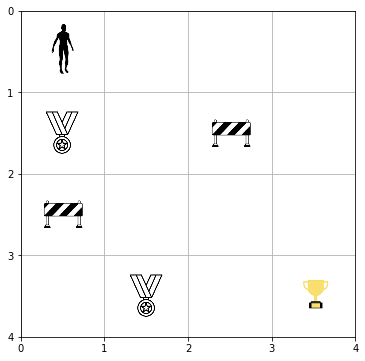

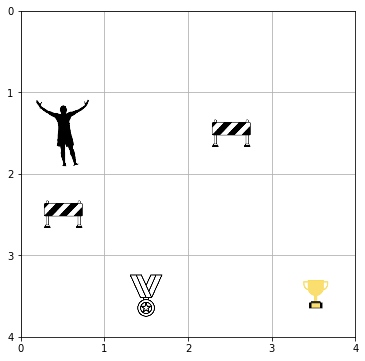

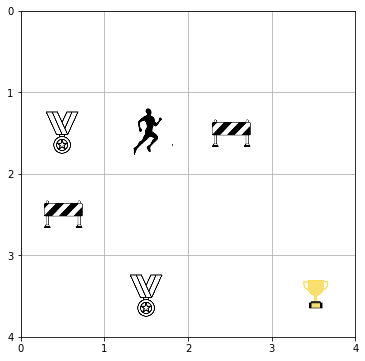

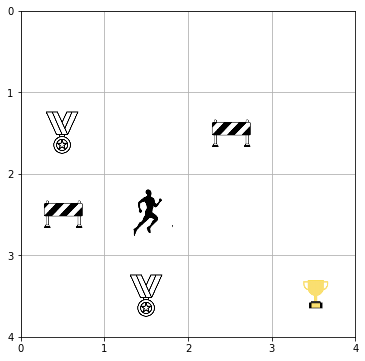

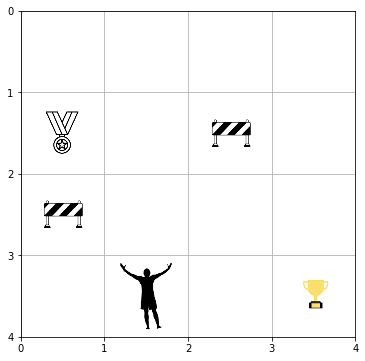

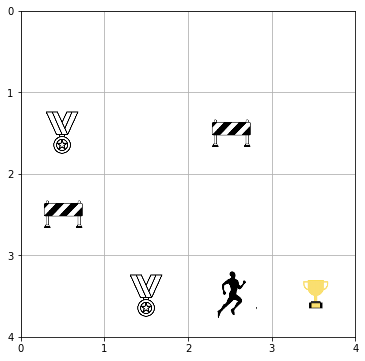

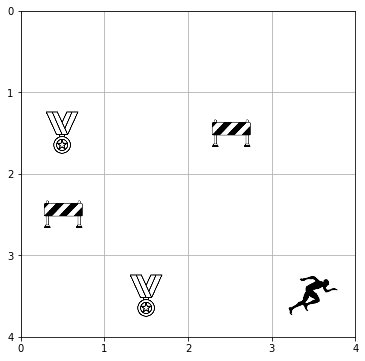






 #################### TESTING THE ALGORITHMS FOR 10 EPISODES #######################


Evaluating Q-Learning for deterministic environment for 10 episodes


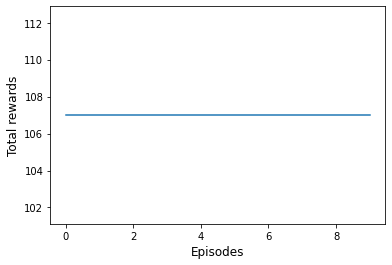



Evaluating SARSA for deterministic environment for 10 episodes


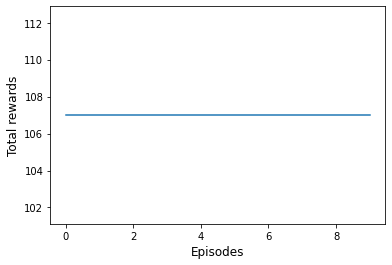



Evaluating Q-Learning for Stochastic environment for 10 episodes


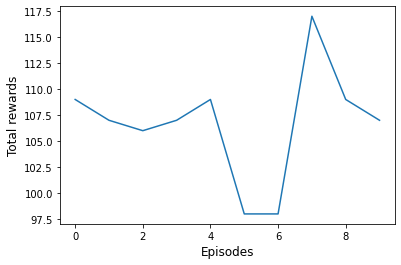



Evaluating SARSA for Stochastic environment for 10 episodes


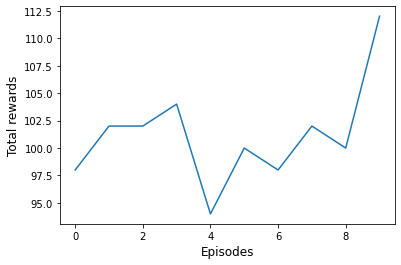




 Comparing for deterministic environment using Q-Learning and SARSA with graph and bar chart



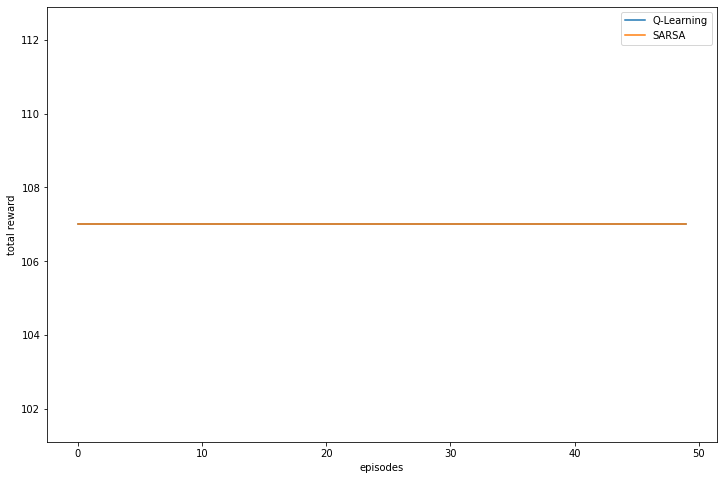

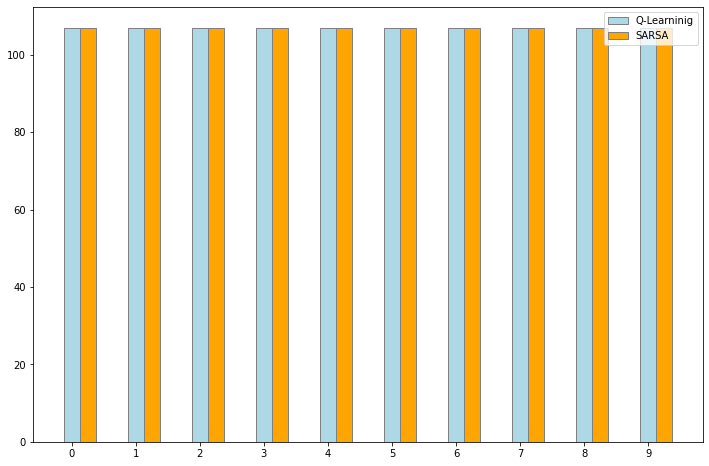




 Comparing for Stochastic environment using Q-Learning and SARSA with graph and bar chart



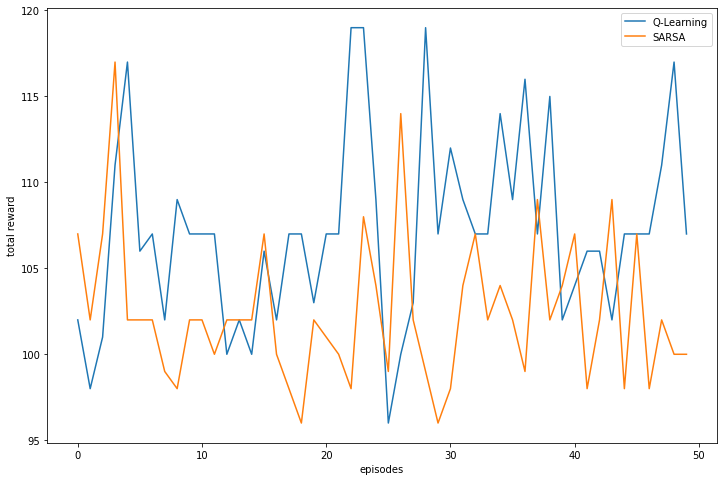

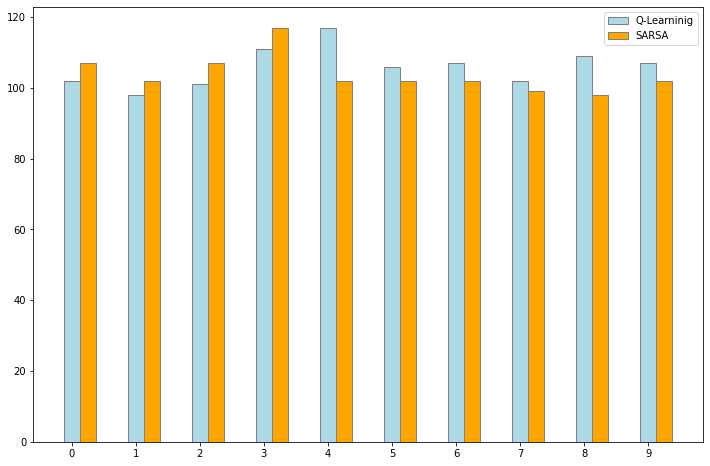

In [ ]:
main()